## Climate Matters: Annual Surface Temperature Change

Description: This indicator presents the mean surface temperature change during the period 1961-2021, using temperatures between 1951 and 1980 as a baseline.

### Summary

[The dataset](https://climatedata.imf.org/pages/climatechange-data#cc5) is sourced from the The International Monetary Fund (IMF) Climate Change Dashboard.

| Technique | Example Use Case                       | Advantages                                           | Limitations                                                |
|-----------|----------------------------------------|------------------------------------------------------|------------------------------------------------------------|
| PCA       | Face Recognition                      | - Efficient linear dimensionality reduction.         | - Not suitable for capturing nonlinear relationships.       |
|           |                                      | - Useful for capturing overall data structure.       |                                                            |
|           |                                      | - Widely used for feature extraction.                |                                                            |
|           |                                      |                                                    |                                                            |
| t-SNE     | Visualizing High-Dimensional Data     | - Effective at preserving local structures.          | - Computationally expensive for large datasets.            |
|           |                                      | - Useful for data visualization and clustering.      | - May not preserve global structures well.                 |
|           |                                      | - Reveals clusters and patterns in complex data.     |                                                            |
|           |                                      |                                                    |                                                            |
| UMAP      | Single-Cell RNA Sequencing (scRNA-seq) Data | - Preserves both local and global structures.      | - Requires tuning hyperparameters.                          |
|           |                                      | - Outperforms t-SNE in preserving global structures.| - Sensitive to choice of distance metric.                  |
|           |                                      | - Suitable for large datasets.                      |                                                            |
|           |                                      |                                                    |                                                            |

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Read Dataset

In [2]:
# Read csv data
df = pd.read_csv("assets/input/surface_temperature_change.csv")

### Get Ready for Analyses

In [ ]:
# Fillna method to replace NaN with 0
df.fillna(0, inplace=True)

In [3]:
# Extract the relevant columns for PCA
features = df.loc[:, 'F1961':'F2022']

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### PCA (Principal Component Analysis)

In [4]:
# Initialize the PCA object
pca = PCA()

# Apply PCA to the scaled data
principal_components = pca.fit_transform(scaled_features)

In [5]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.25779459 0.14512022 0.11736266 0.05475536 0.03903517 0.03804675
 0.03149161 0.02786375 0.0232027  0.02252726 0.01992617 0.01814912
 0.01597468 0.01447799 0.01354749 0.01116087 0.01082209 0.01039067
 0.00946727 0.00908551 0.00827712 0.00765799 0.00710307 0.00632949
 0.00531246 0.0050657  0.0047708  0.00470492 0.00430094 0.00403984
 0.00377747 0.00343493 0.00310871 0.00300384 0.00296827 0.00262487
 0.00252868 0.00237835 0.00221611 0.00219116 0.00207381 0.00202093
 0.00177931 0.00171945 0.00158665 0.00152658 0.00143559 0.00124778
 0.00117276 0.00108223 0.00100297 0.00097614 0.00089601 0.00087567
 0.00079536 0.00070872 0.00065556 0.00061797 0.000559   0.00045034
 0.00041796 0.00040256]


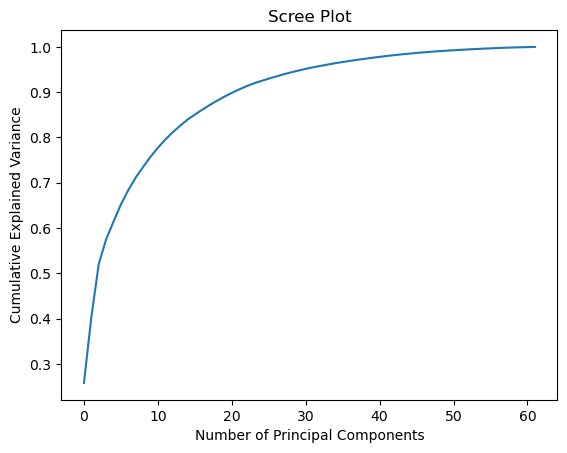

In [6]:
# Plotting the scree plot
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [25]:
# Choose the number of principal components based on the scree plot analysis
n_components = 5

# Perform PCA with the selected number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

In [26]:
# Get the loadings of each original feature on the principal components
loadings_df = pd.DataFrame(pca.components_, columns=features.columns)

# Sort the loadings by the most significant component (highest absolute values)
sorted_loadings_df = loadings_df.apply(lambda x: x.abs().sort_values(ascending=False).index, axis=1)
sorted_loadings_df.head()

0    Index(['F2008', 'F2000', 'F2014', 'F2022', 'F2...
1    Index(['F2010', 'F1962', 'F1979', 'F1963', 'F1...
2    Index(['F1987', 'F1980', 'F1993', 'F1997', 'F1...
3    Index(['F1966', 'F1994', 'F1977', 'F1965', 'F1...
4    Index(['F1972', 'F1981', 'F1965', 'F2006', 'F1...
dtype: object

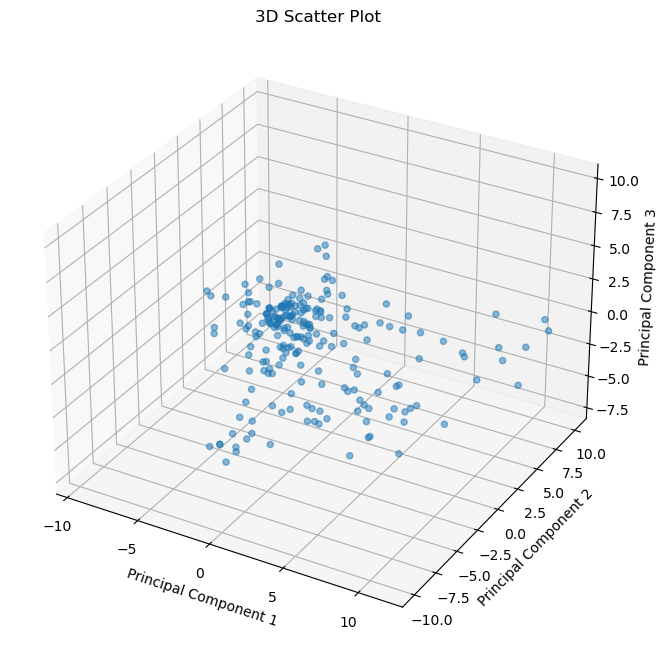

In [27]:
# 3D Scatter Plot (for 3 principal components)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot')
plt.show()

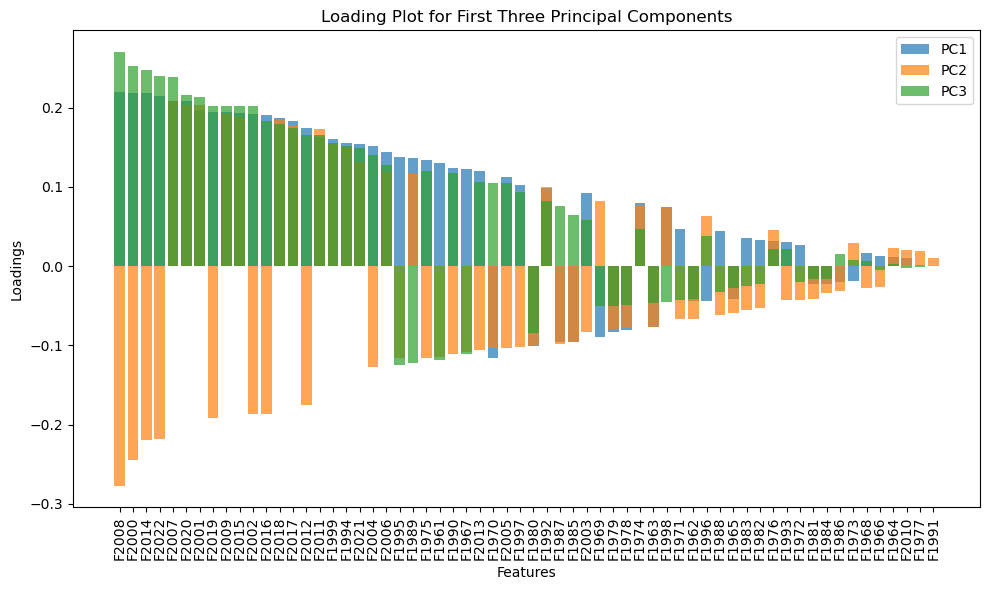

In [28]:
# Plot the loading plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(features.columns)), loadings_df.loc[0, sorted_loadings_df.iloc[0]], alpha=0.7, label='PC1')
plt.bar(range(len(features.columns)), loadings_df.loc[1, sorted_loadings_df.iloc[1]], alpha=0.7, label='PC2')
plt.bar(range(len(features.columns)), loadings_df.loc[2, sorted_loadings_df.iloc[2]], alpha=0.7, label='PC3')
plt.xticks(range(len(features.columns)), sorted_loadings_df.iloc[0], rotation=90)
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.title('Loading Plot for First Three Principal Components')
plt.legend()
plt.tight_layout()
plt.show()

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [31]:
# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)

# Apply t-SNE to the data
tsne_result = tsne.fit_transform(features)

# Create a new DataFrame for the t-SNE result
tsne_df = pd.DataFrame(data=tsne_result, columns=['tsne_component_1', 'tsne_component_2'])

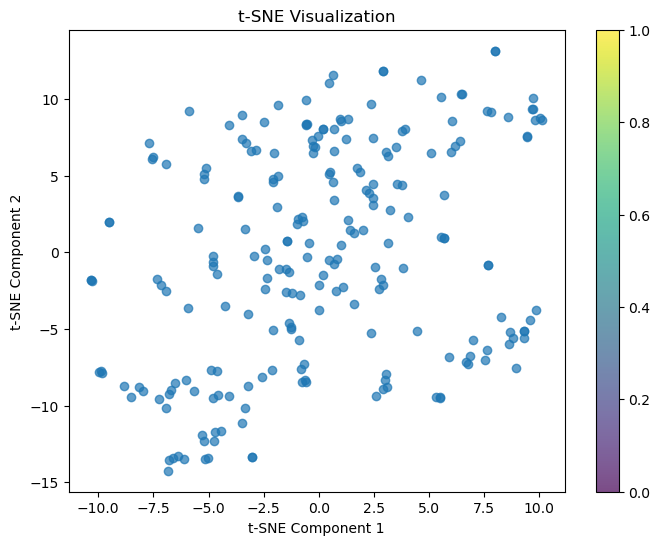

In [44]:
# Plot the t-SNE result without coloring based on a target column
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['tsne_component_1'], tsne_df['tsne_component_2'], alpha=0.7, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.colorbar()  # Add colorbar
plt.show()

### UMAP (Uniform Manifold Approximation and Projection)

In [39]:
# Initialize UMAP with desired parameters
umap_model = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.1, random_state=42)

# Apply UMAP to the data
umap_result = umap_model.fit_transform(features)

# Create a new DataFrame for the UMAP result
umap_df = pd.DataFrame(data=umap_result, columns=['umap_component_1', 'umap_component_2'])

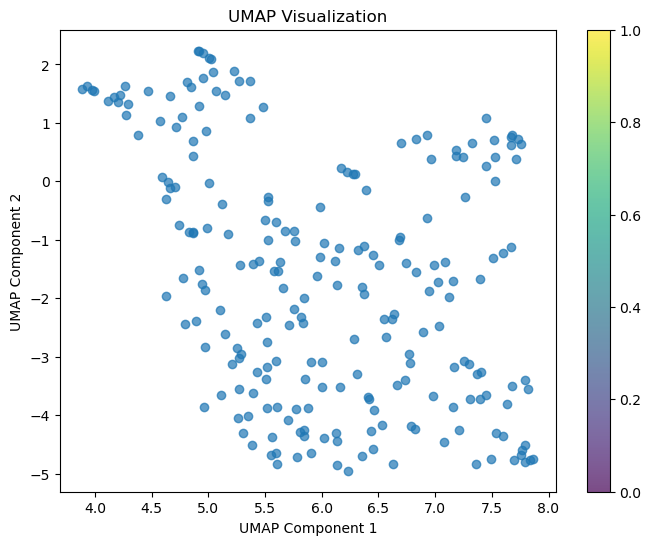

In [45]:
# Plot the UMAP result without coloring based on a target column
plt.figure(figsize=(8, 6))
plt.scatter(umap_df['umap_component_1'], umap_df['umap_component_2'], alpha=0.7, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Visualization')
plt.colorbar()  # Add colorbar
plt.show()